In [1]:
import numpy as np
import pandas as pd
import os
import kagglehub

path = ""
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        path = (os.path.join(dirname, filename))

df = pd.read_csv(path)

df.head()

,reviewId,userName,content,score,thumbsUpCount,reviewCreatedVersion,at,appVersion
0,862124cd-d242-4654-a033-e55306d91de5,Siyasharan Yadav,zdyenne,1,0,NaN,2025-08-13 10:35:11,NaN
1,ab9e18a1-99c9-4c03-9768-c8fc9e4117af,MyoThiha Thiha,good... Thanks,5,0,NaN,2025-08-12 07:34:10,NaN
2,411b1938-8ff1-45ee-9013-f973988c52c6,Gaurav Parikh,gauravparikh,5,0,8.4.0 build 12 40035,2025-08-10 04:48:53,8.4.0 build 12 40035
3,7e3ec6c4-2b53-4e3f-b1b3-eba265859a9d,Gaurav Parikh,gauravparikh,5,0,8.4.0 build 12 40035,2025-08-08 11:26:36,8.4.0 build 12 40035
4,18046d58-0cb1-4f41-814c-0f51c44a4dc7,Gaurav Parikh,gauravparikh,5,0,8.4.0 build 12 40035,2025-08-04 11:29:48,8.4.0 build 12 40035


Check Dataset Shape & Types

In [2]:
print(f"Rows: {df.shape[0]}, Columns: {df.shape[1]}")

df.info()

Rows: 138962, Columns: 8
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138962 entries, 0 to 138961
Data columns (total 8 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   reviewId              138962 non-null  object
 1   userName              138960 non-null  object
 2   content               138956 non-null  object
 3   score                 138962 non-null  int64 
 4   thumbsUpCount         138962 non-null  int64 
 5   reviewCreatedVersion  115290 non-null  object
 6   at                    138962 non-null  object
 7   appVersion            115290 non-null  object
dtypes: int64(2), object(6)
memory usage: 8.5+ MB


The dataset has 138,955 observations.

Checking for null values

In [3]:
df.isnull().sum()

reviewId                    0
userName                    2
content                     6
score                       0
thumbsUpCount               0
reviewCreatedVersion    23672
at                          0
appVersion              23672
dtype: int64

In [4]:
df.dropna(subset=['content', 'score'], inplace=True)

Visualize Rating Distribution

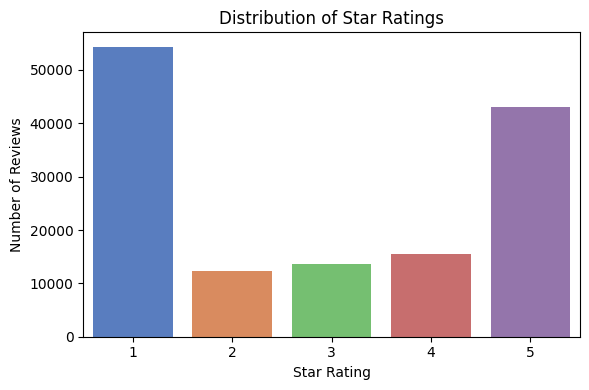

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
sns.countplot(x='score', data=df, palette='muted')
plt.title('Distribution of Star Ratings')
plt.xlabel('Star Rating')
plt.ylabel('Number of Reviews')
plt.tight_layout()
plt.show()

We need to classify the ratings by mapping scores to sentiments. We can classify sentiment based on the following score:

1–2 stars = Negative

3 stars = Neutral

4–5 stars = Positive

In [6]:
def map_sentiment(score):
    if score <= 2:
        return 'negative'
    elif score == 3:
        return 'neutral'
    else:
        return 'positive'

df['sentiment'] = df['score'].apply(map_sentiment)
df.head()

,reviewId,userName,content,score,thumbsUpCount,reviewCreatedVersion,at,appVersion,sentiment
0,862124cd-d242-4654-a033-e55306d91de5,Siyasharan Yadav,zdyenne,1,0,NaN,2025-08-13 10:35:11,NaN,negative
1,ab9e18a1-99c9-4c03-9768-c8fc9e4117af,MyoThiha Thiha,good... Thanks,5,0,NaN,2025-08-12 07:34:10,NaN,positive
2,411b1938-8ff1-45ee-9013-f973988c52c6,Gaurav Parikh,gauravparikh,5,0,8.4.0 build 12 40035,2025-08-10 04:48:53,8.4.0 build 12 40035,positive
3,7e3ec6c4-2b53-4e3f-b1b3-eba265859a9d,Gaurav Parikh,gauravparikh,5,0,8.4.0 build 12 40035,2025-08-08 11:26:36,8.4.0 build 12 40035,positive
4,18046d58-0cb1-4f41-814c-0f51c44a4dc7,Gaurav Parikh,gauravparikh,5,0,8.4.0 build 12 40035,2025-08-04 11:29:48,8.4.0 build 12 40035,positive


Now lets see the sentiment distribution

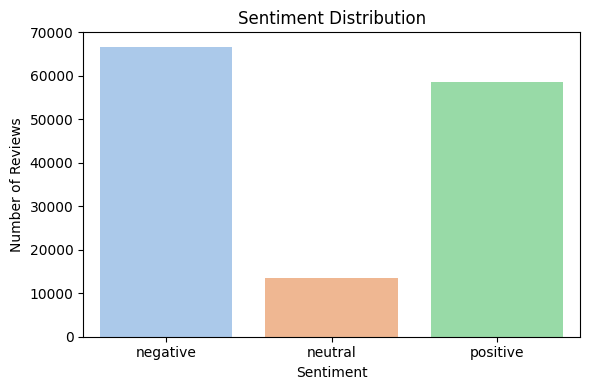

In [7]:
plt.figure(figsize=(6, 4))
sns.countplot(x='sentiment', data=df, order=['negative', 'neutral', 'positive'], palette='pastel')
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Number of Reviews')
plt.tight_layout()
plt.show()

Negative sentiment is the most dominant class. With over 66k negative reviews, users are more likely to express dissatisfaction than praise in their feedback. This could be due to common app issues like bugs, billing problems, or streaming glitches.

Positive reviews are slightly fewer but still strong. Around 58k positive reviews indicate that many users are satisfied with the app — likely praising the content library, performance, or recent improvements.

Neutral sentiment is significantly underrepresented. Only 13.5k reviews are neutral, showing that users tend to leave feedback when they feel strongly — either positively or negatively.

In [8]:
import re

def clean_text(text):
    # Remove URLs
    text = re.sub(r'http\S+|www\S+|https\S+', '', text)
    
    # Remove HTML tags
    text = re.sub(r'<.*?>', '', text)

    # Remove emojis and non-alphabetic characters
    text = re.sub(r'[^a-zA-Z\s]', '', text)

    # Convert to lowercase
    text = text.lower()

    # Remove extra spaces
    text = re.sub(r'\s+', ' ', text).strip()

    return text

# Apply cleaning
df['cleaned_content'] = df['content'].astype(str).apply(clean_text)
df['cleaned_content'].head()

0         zdyenne
1     good thanks
2    gauravparikh
3    gauravparikh
4    gauravparikh
Name: cleaned_content, dtype: object

Lets remove Stopwords. These are common words like Stopwords are common words like "the", "is", "and" that don't carry useful sentiment.

In [9]:
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')

stop_words = set(stopwords.words('english'))

def remove_stopwords(text):
    return ' '.join([word for word in text.split() if word not in stop_words])

df['cleaned_content'] = df['cleaned_content'].apply(remove_stopwords)

df['cleaned_content']


[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


0                                                   zdyenne
1                                               good thanks
2                                              gauravparikh
3                                              gauravparikh
4                                              gauravparikh
                                ...                        
138957                really like many movies kdramas watch
138958                 love netflix always enjoy time using
138959                            sound quality slow movies
138960    rate expensive bcos see netflix sunday charged...
138961            app awesome english movies series tv show
Name: cleaned_content, Length: 138956, dtype: object

Now that the text is cleaned, we convert it into numeric vectors using TF-IDF (Term Frequency–Inverse Document Frequency).

In [10]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize vectorizer
vectorizer = TfidfVectorizer(max_features=5000)  # Limit to top 5000 words

# Transform text data
X = vectorizer.fit_transform(df['cleaned_content'])

# Labels
y = df['sentiment']

At this point:

X is a matrix of TF-IDF features (words)

y is your target sentiment label (negative, neutral, positive)

We will split the data with the ration 80% of the data for training and 20% of the  for testing.

In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)


Now we are ready to test models. We'll test a mix of traditional ML algorithms often used in sentiment analysis:

* Logistic RegressionRandom
* ForestLinear
* SVCMultinomial
* Naive Bayes

In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

models = {
    "Logistic Regression": LogisticRegression(max_iter=2000),
    "Random Forest": RandomForestClassifier(n_estimators=100),
    "Linear SVC": LinearSVC(),
    "Naive Bayes": MultinomialNB()
}

results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, output_dict=True)
    f1_macro = report['macro avg']['f1-score']

    results[name] = {"Accuracy": acc, "F1-Score": f1_macro}

# Display results
pd.DataFrame(results).T.sort_values(by="F1-Score", ascending=False)


,Accuracy,F1-Score
Logistic Regression,0.796884,0.581620
Linear SVC,0.792926,0.567679
Random Forest,0.785298,0.553335
Naive Bayes,0.776770,0.547573


In [13]:
my_review = ["I worst how the streaming is!"]

# Step 1: Transform review into same vector space as training data
my_review_vectorized = vectorizer.transform(my_review)
log_reg_model = models["Logistic Regression"]
# Step 2: Predict sentiment
predicted_label = log_reg_model.predict(my_review_vectorized)[0]

# Step 3: Optional - Predict probability
predicted_proba = log_reg_model.predict_proba(my_review_vectorized)

print("Predicted sentiment:", predicted_label)
print("Prediction confidence:", predicted_proba)

Predicted sentiment: negative
Prediction confidence: [[0.97431507 0.01263201 0.01305292]]
